# Grape Disease Detection

In this project, we will build a classification model using own disease type labeled grape disease images obtained from Kaggle.com and use Keras deep learning. We will then save our model. We will integrate the model into our website that we prepared with Streamlit library. When we provide a new grape leaf image, the model will predict whether it has disease or not, and if so, which disease type it belongs to.

<img src='https://www.researchgate.net/publication/333315332/figure/fig4/AS:962376841039931@1606459927784/Three-kind-of-diseased-grape-leaf-disease-1-disease-3-and-healthy-grape-leaf.png' >

<a href='https://www.kaggle.com/datasets/rm1000/augmented-grape-disease-detection-dataset/dataset'> Click here to reach data <a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))



In [2]:
import cv2
import os
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
main_path=('/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/')

In [4]:
img_list=[]
label_list=[]
for folder in os.listdir(main_path):
    folder_path=os.path.join(main_path,folder)
    for filename in os.listdir(folder_path):
        img_path=os.path.join(folder_path,filename)
        img_list.append(img_path)
        label_list.append(folder)

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.sample(5)

,img,label
10338,/kaggle/input/augmented-grape-disease-detectio...,Black Rot
10444,/kaggle/input/augmented-grape-disease-detectio...,Black Rot
8625,/kaggle/input/augmented-grape-disease-detectio...,Leaf Blight
9579,/kaggle/input/augmented-grape-disease-detectio...,Black Rot
7279,/kaggle/input/augmented-grape-disease-detectio...,Leaf Blight


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     12000 non-null  object
 1   label   12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB


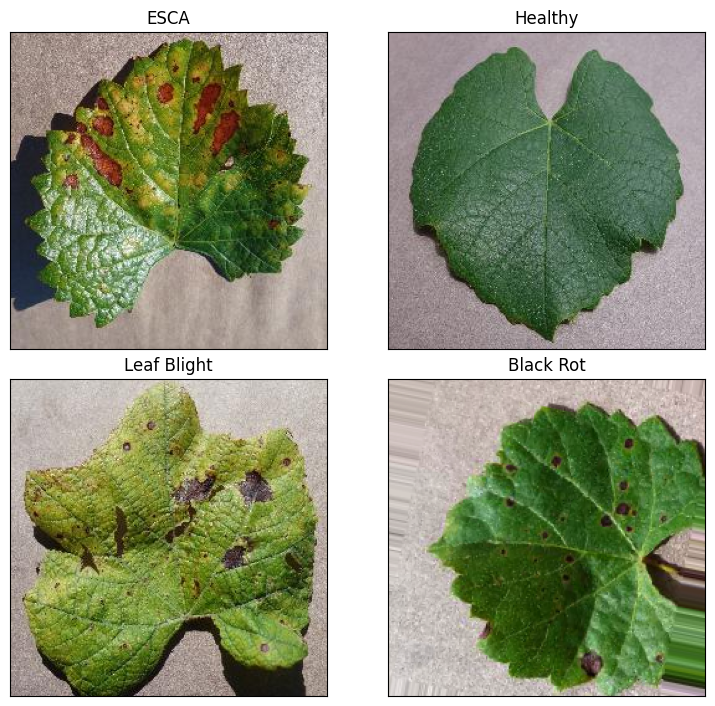

In [8]:
df_unique = df.copy().drop_duplicates(subset=["label"]).reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique['img'][i]))
    ax.set_title(df_unique['label'][i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [9]:
df['label'].value_counts()

label
ESCA           3000
Healthy        3000
Leaf Blight    3000
Black Rot      3000
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

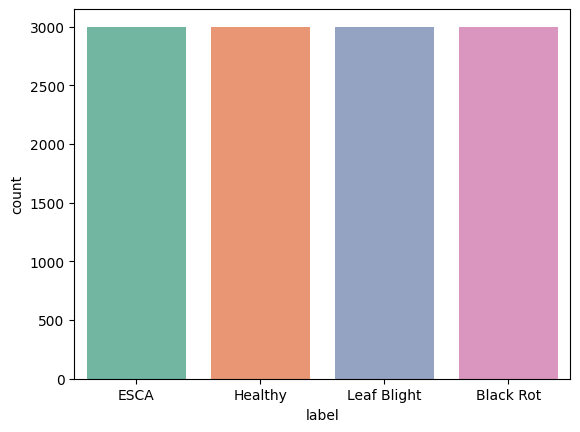

In [10]:
sns.countplot(x='label',data=df,palette='Set2')

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [12]:
df.sample(5)

,img,label,encode_label
9975,/kaggle/input/augmented-grape-disease-detectio...,Black Rot,0
4464,/kaggle/input/augmented-grape-disease-detectio...,Healthy,2
2995,/kaggle/input/augmented-grape-disease-detectio...,ESCA,1
1996,/kaggle/input/augmented-grape-disease-detectio...,ESCA,1
708,/kaggle/input/augmented-grape-disease-detectio...,ESCA,1


In [13]:
label_dict = dict(zip(df['encode_label'], df['label']))
sorted_label_dict = dict(sorted(label_dict.items()))
output = ',\n'.join([f"{key}:'{value}'" for key, value in sorted_label_dict.items()])

print(output)

0:'Black Rot',
1:'ESCA',
2:'Healthy',
3:'Leaf Blight'


### Deep Learning

We will identify x and y datas.

In [14]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(170,170)) #We resized the image to 32x32 pixels.
    img=img/255.0 #normalize the data
    x.append(img)

In [15]:
x=np.array(x)

In [16]:
y=df['encode_label']

Let's import train test split and we will split%20 of our datas as test data.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

CNN - Convolutional Neural Networks

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape

In [20]:
model = Sequential()
model.add(Input(shape=(170,170,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10


I0000 00:00:1728819503.136606      72 service.cc:145] XLA service 0x787c380051b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728819503.137318      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728819503.137330      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  6/300 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.1922 - loss: 6.6154

I0000 00:00:1728819507.512843      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6918 - loss: 1.1451 - val_accuracy: 0.9337 - val_loss: 0.1728
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9533 - loss: 0.1329 - val_accuracy: 0.9279 - val_loss: 0.1872
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9757 - loss: 0.0735 - val_accuracy: 0.9392 - val_loss: 0.1520
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9849 - loss: 0.0429 - val_accuracy: 0.9700 - val_loss: 0.0888
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9679 - val_loss: 0.1045
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9642 - val_loss: 0.0986
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9970 - loss: 0.0134 - val_accuracy: 0.9663 - val_loss: 0.1254
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9964 - loss: 0.0108 - val_accuracy: 0.96

In [22]:
model.save('grape_disease_model.h5')

We trained and saved our model.Now we can use it in any algorithm.

## Transfer Learning

We trained a new model from scratch using CNN. However, we can also achieve our goal by using pre-trained models and providing them with our own data. Among the pre-trained models, the most widely used in the field of image processing are the ResNet50 and VGG16 models. Here, we will use the VGG16 model.

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
data_dir='/kaggle/input/augmented-grape-disease-detection-dataset/Final Training Data/'
img_width,img_heigth=32,32

train_datagen=ImageDataGenerator(rescale=1/255, validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 9600 images belonging to 4 classes.
Found 2400 images belonging to 4 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 59s 181ms/step - accuracy: 0.6798 - loss: 0.7563 - val_accuracy: 0.8042 - val_loss: 0.4675
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.7982 - loss: 0.4860 - val_accuracy: 0.8171 - val_loss: 0.4527
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.8221 - loss: 0.4389 - val_accuracy: 0.8383 - val_loss: 0.4029
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8276 - loss: 0.4052 - val_accuracy: 0.8308 - val_loss: 0.4512
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.8546 - loss: 0.3609 - val_accuracy: 0.8446 - val_loss: 0.3940
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - accuracy: 0.8572 - loss: 0.3432 - val_accuracy: 0.8263 - val_loss: 0.4286
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.8637 - loss: 0.3

In [25]:
model.save('grape_disease_tf_model.h5')

### Conclusion

We turned the file paths of the grape disease images obtained from Kaggle.com into a DataFrame with the help of the Pandas and OS libraries. Then, we sequentially read all the images using the OpenCV library and normalized them for easier processing. Afterward, we trained our model using Keras deep learning. As a second step, we used the VGG16 model by feeding our data into it, training the pre-trained model with our data, and making it suitable for our purpose. Both methods can be used for Image Classification, but since training a model from scratch is a time-consuming process, the common approach is to use a pre-trained model and apply transfer learning.